## Importing libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data.csv")

In [5]:
data = df.copy()

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.shape

(541909, 8)

# Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
data["CustomerID"].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [10]:
# total no of stock code
print(len(data["StockCode"].value_counts()))


4070


In [11]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data = data.dropna(subset=["CustomerID"])

In [14]:
data.duplicated().sum()

5225

In [15]:
#remove the duplicate rows 
df.drop_duplicates(inplace=True)


# feature Engineering

In [16]:
# creating new features
data['TotalSpending'] = data['Quantity'] * data['UnitPrice']


In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
# Drop rows with negative total spending
data = data[data['TotalSpending'] >0]

# Reset the index after dropping rows
data = data.reset_index(drop=True)

In [19]:
data.drop_duplicates(inplace=True)


In [20]:
data.shape


(392692, 9)

In [21]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
annual_spending = data.groupby('CustomerID')['TotalSpending'].sum()

In [24]:
data = data.merge(annual_spending, on='CustomerID', suffixes=('', '_yearSpending'))


In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_yearSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21


In [26]:
#Extract year from InvoiceDate to create a new feature 'Year'
data['Year'] = data['InvoiceDate'].dt.year

In [27]:
data['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Belgium', 'Netherlands',
       'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland',
       'Portugal', 'Italy', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Austria', 'Cyprus', 'Sweden',
       'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'TotalSpending'}>,
        <Axes: title={'center': 'TotalSpending_yearSpending'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

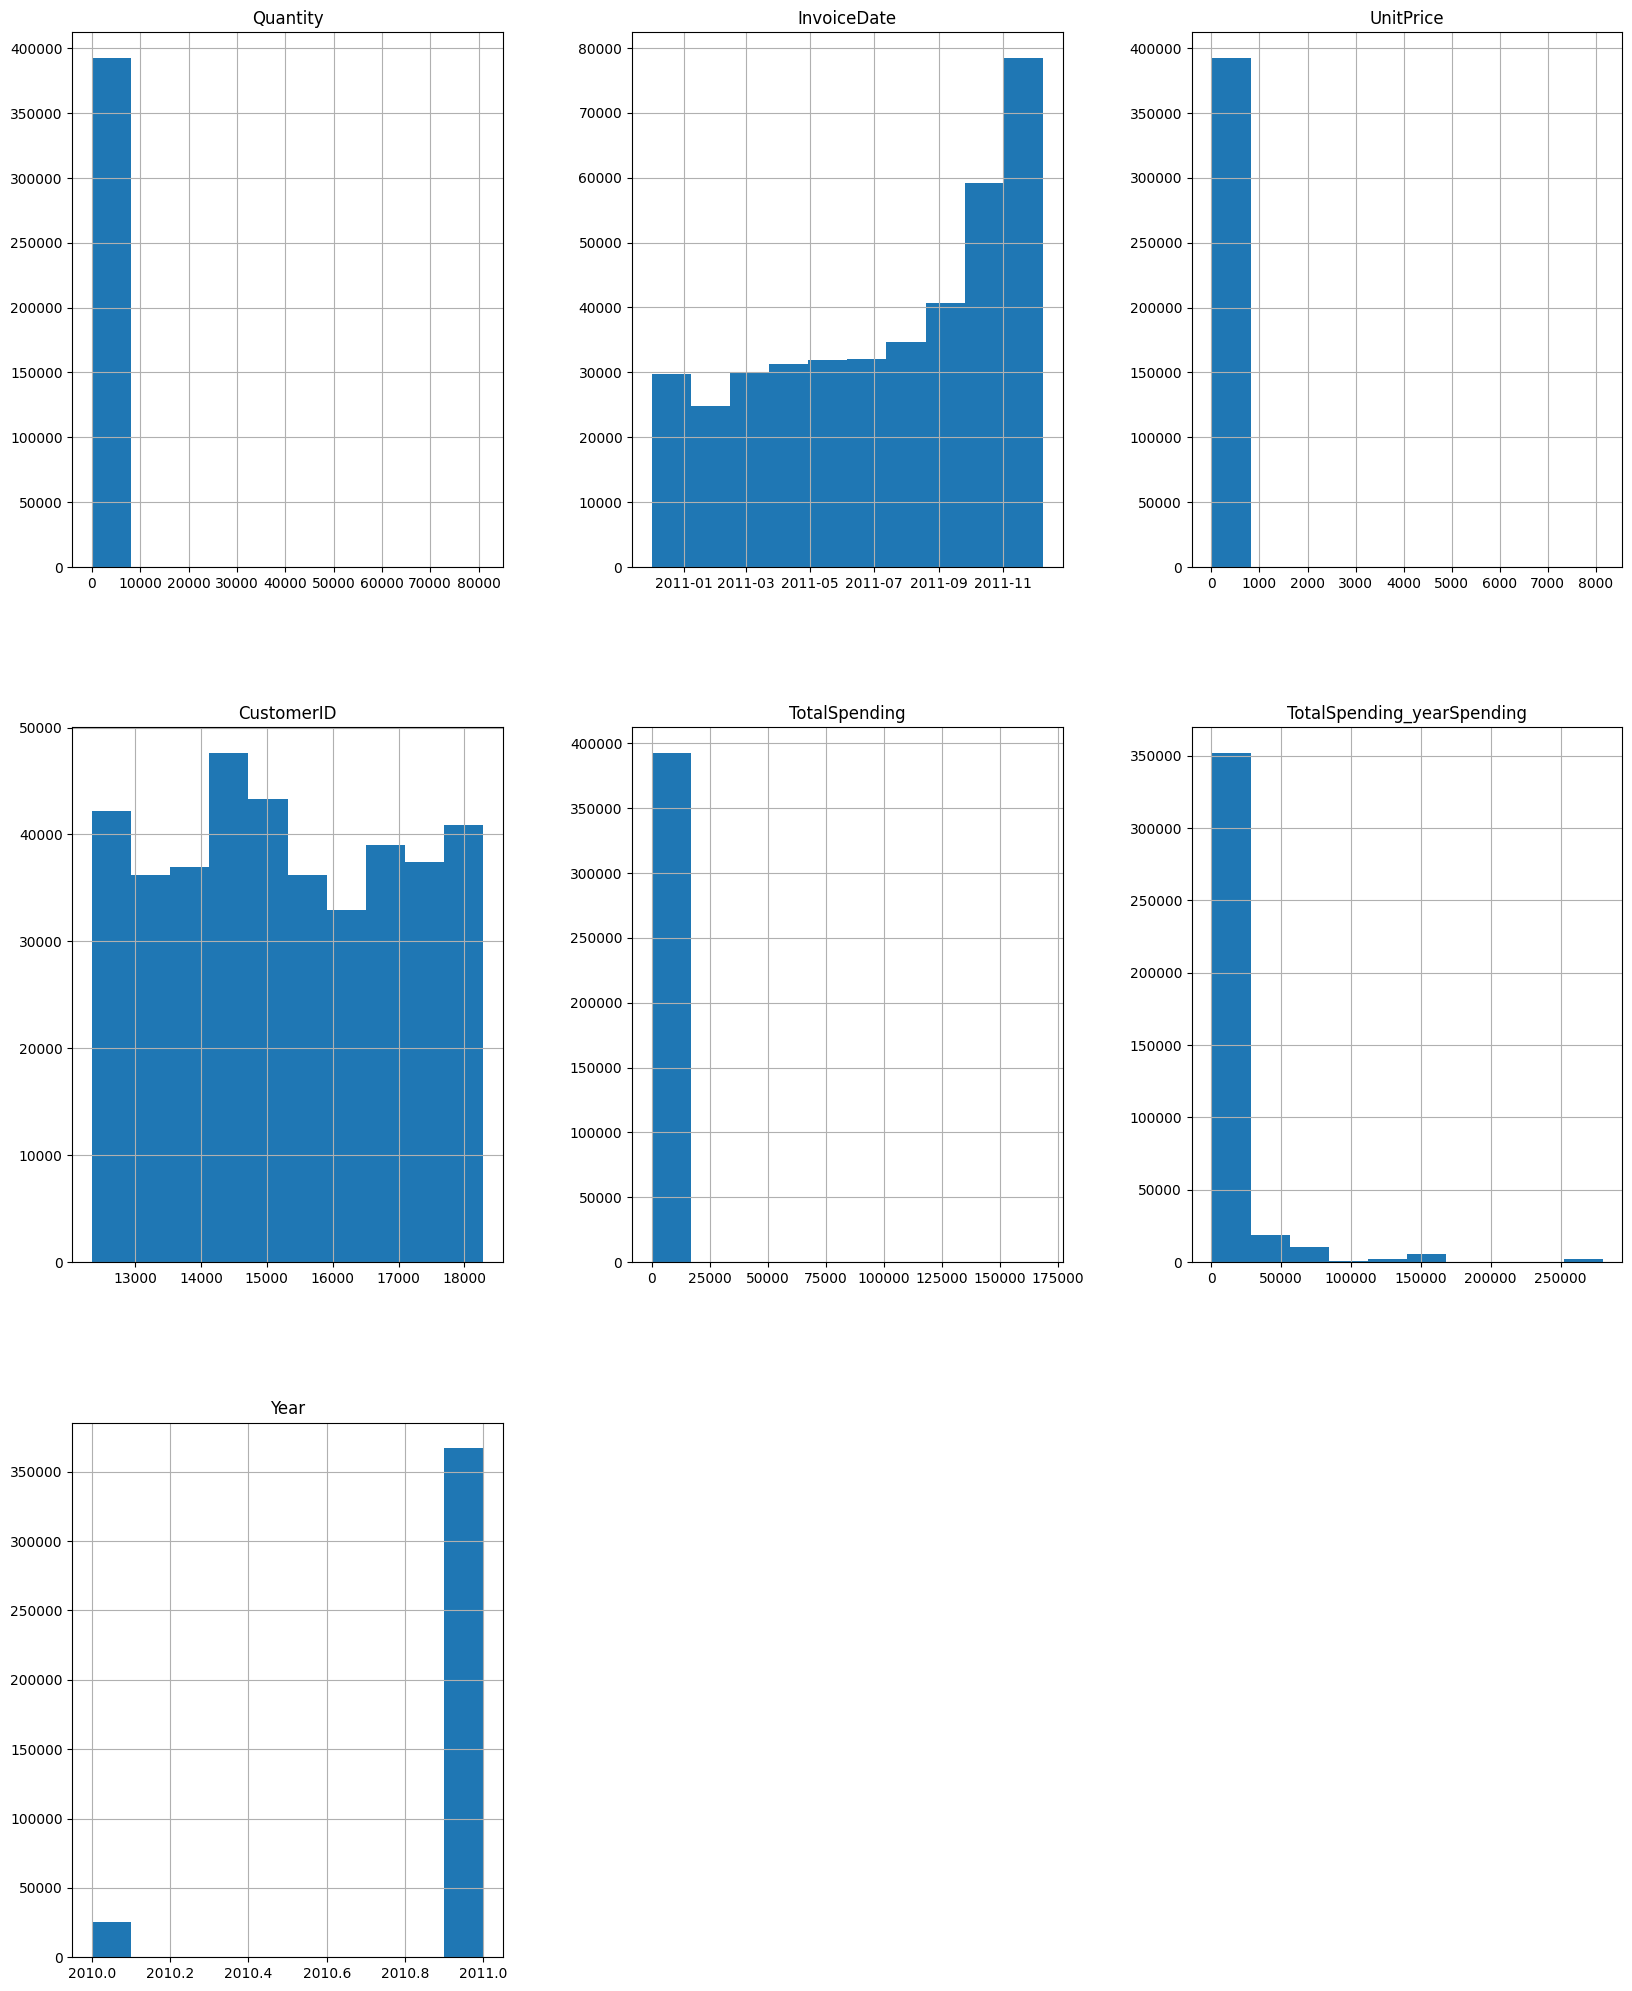

In [28]:
data.hist(figsize=(20,25))

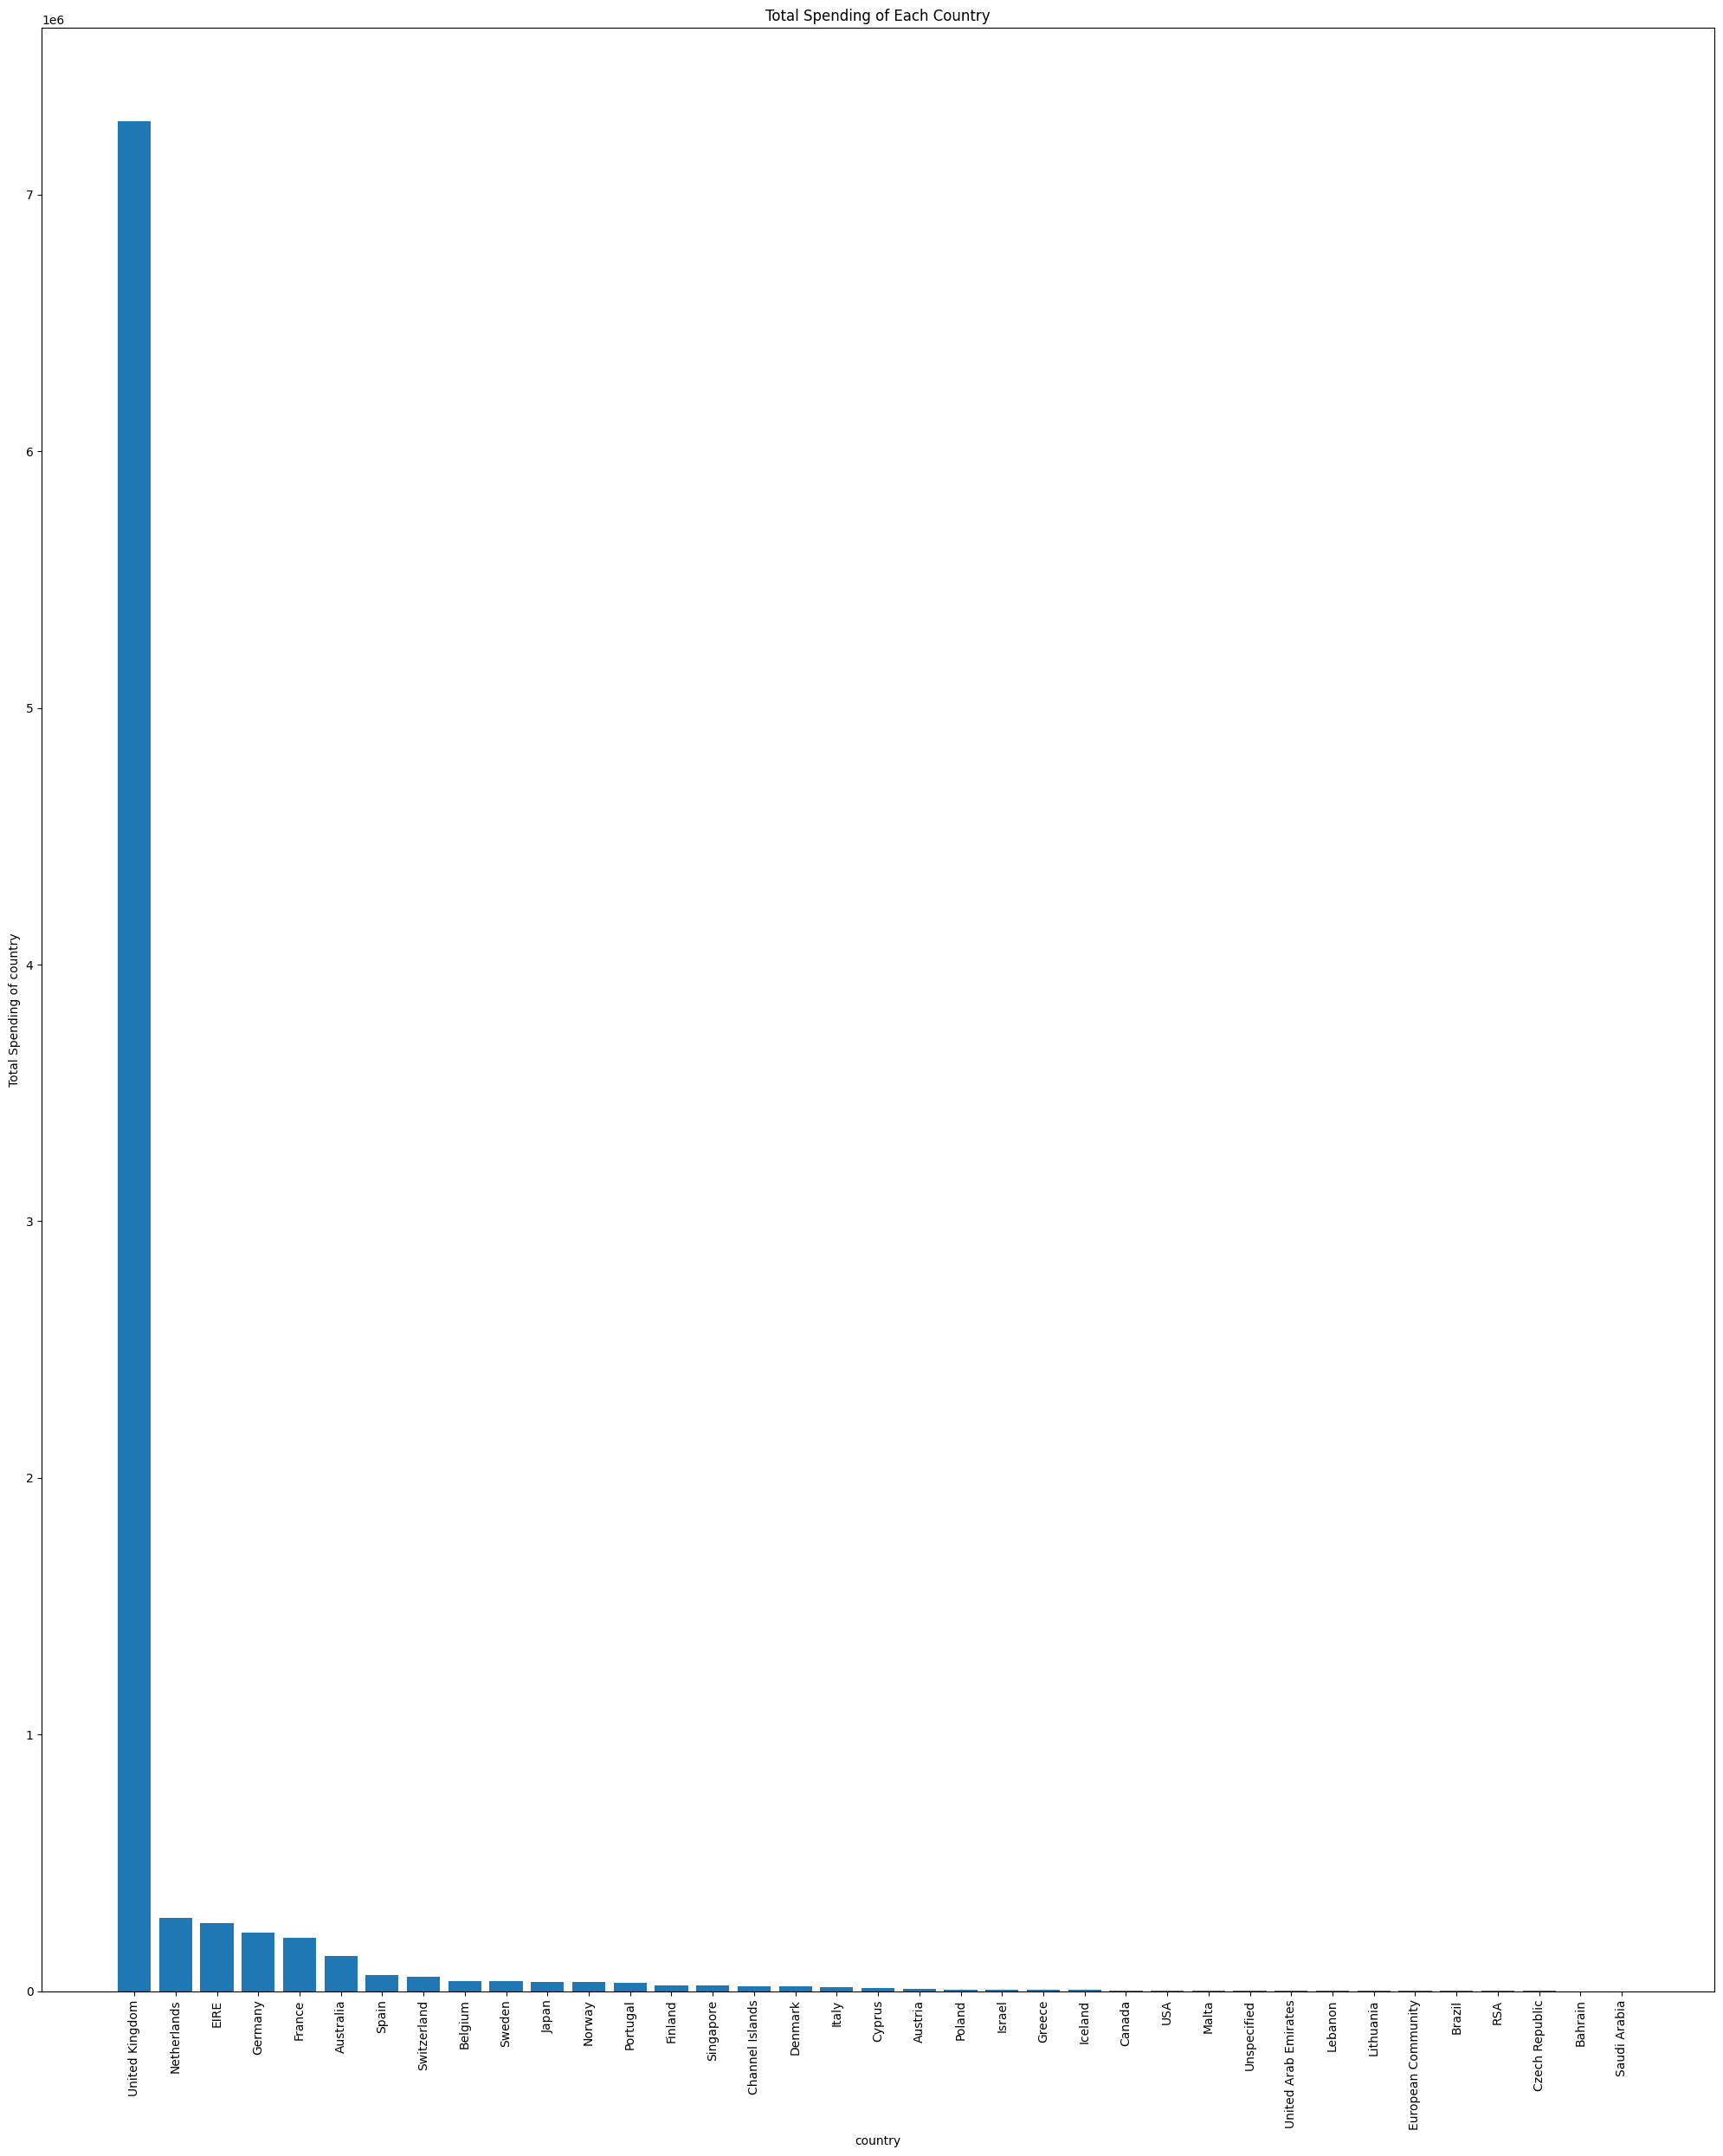

In [29]:
country_spending = data.groupby('Country')['TotalSpending'].sum()
country_spending = country_spending.sort_values(ascending=False)
plt.figure(figsize=(20, 25))
plt.bar(country_spending.index, country_spending.values)
plt.xlabel('country')
plt.ylabel('Total Spending of country')
plt.title('Total Spending of Each Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# more costumers are likely from united kingdom

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_yearSpending,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010


# Model building

In [32]:
from sklearn.model_selection import train_test_split ,  GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [33]:
y = data['TotalSpending_yearSpending']

In [35]:
X = data[['Quantity','UnitPrice','Year']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)


In [37]:
results = {}


In [38]:
# Model 1: Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)
y_pred_dt = decision_tree_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
results['Decision Tree Regression'] = {'Model': decision_tree_reg, 'MSE': mse_dt, 'MAE': mae_dt, 'R-squared': r2_dt}


In [39]:
# Model 2: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
results['Linear Regression'] = {'Model': linear_reg, 'MSE': mse_linear, 'MAE': mae_linear, 'R-squared': r2_linear}

In [40]:
# Model 3: Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results['Random Forest Regression'] = {'Model': random_forest_reg, 'MSE': mse_rf, 'MAE': mae_rf, 'R-squared': r2_rf}

In [41]:
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Model: Decision Tree Regression
MSE: 752131842.4093301
MAE: 11661.772578350778
R-squared: 0.22621921629830222
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Model: Linear Regression
MSE: 967342506.6485957
MAE: 14691.394440862688
R-squared: 0.004814048950801397
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Model: Random Forest Regression
MSE: 736937769.9705888
MAE: 11661.658410287006
R-squared: 0.24185062640003174
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


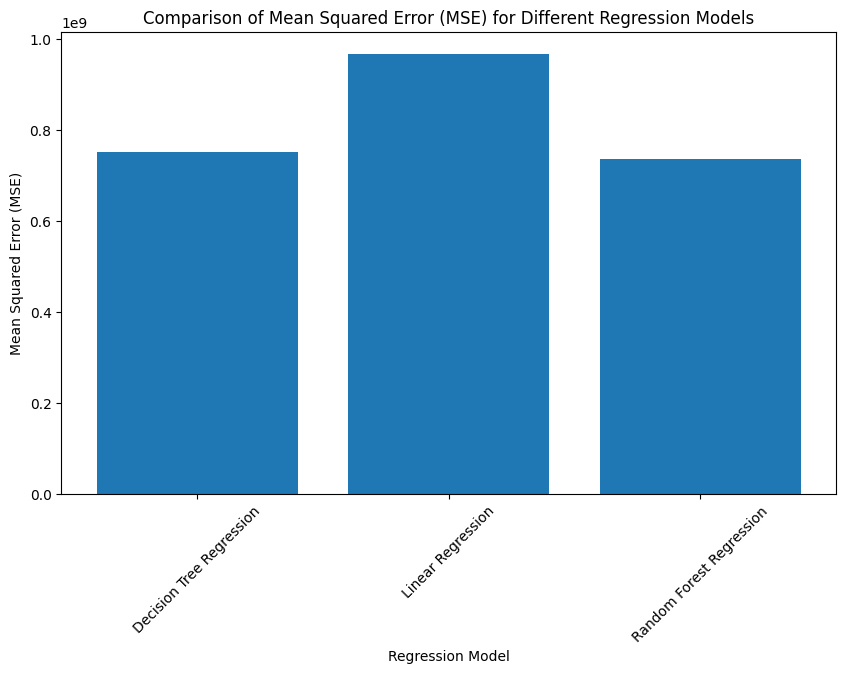

In [42]:
# Create a bar plot to compare MSE for each model
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [metric['MSE'] for metric in results.values()])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regression Models')
plt.xticks(rotation=45)
plt.show()

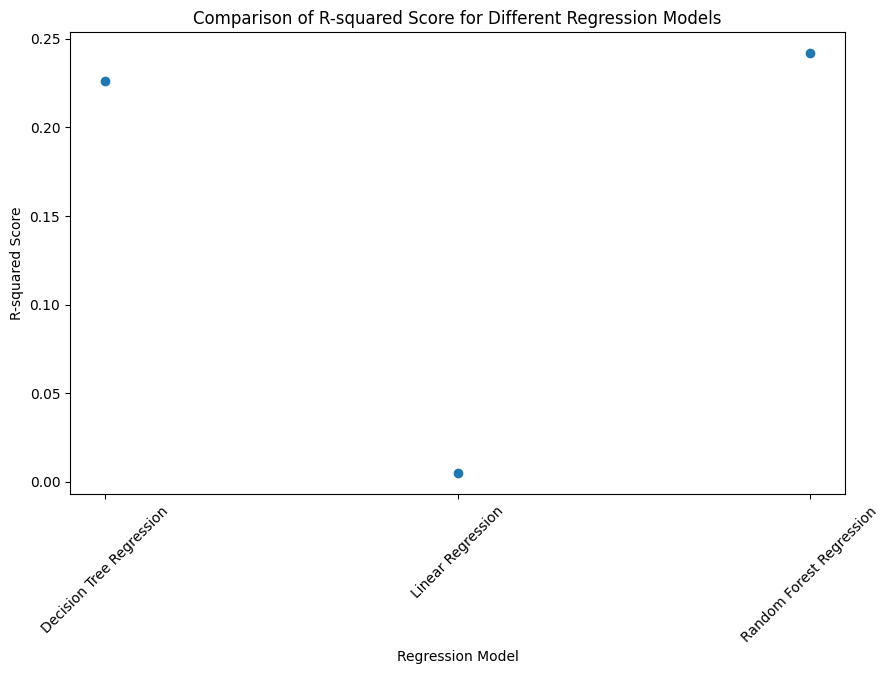

In [43]:
# Create a scatter plot to compare R-squared scores for each model
plt.figure(figsize=(10, 6))
plt.scatter(results.keys(), [metric['R-squared'] for metric in results.values()])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Score for Different Regression Models')
plt.xticks(rotation=45)
plt.show()

 # Customer Segmentation Using Kmeans

In [44]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [45]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending,TotalSpending_yearSpending,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,5391.21,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,2010


In [47]:
new_column_name = {'TotalSpending_yearSpending': 'Annual_Spending'}
data.rename(columns=new_column_name, inplace=True)

In [49]:
# Get the most recent date from the 'InvoiceDate' column
most_recent_date = data['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSpending': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpending': 'MonetaryValue'
}, inplace=True)

In [50]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


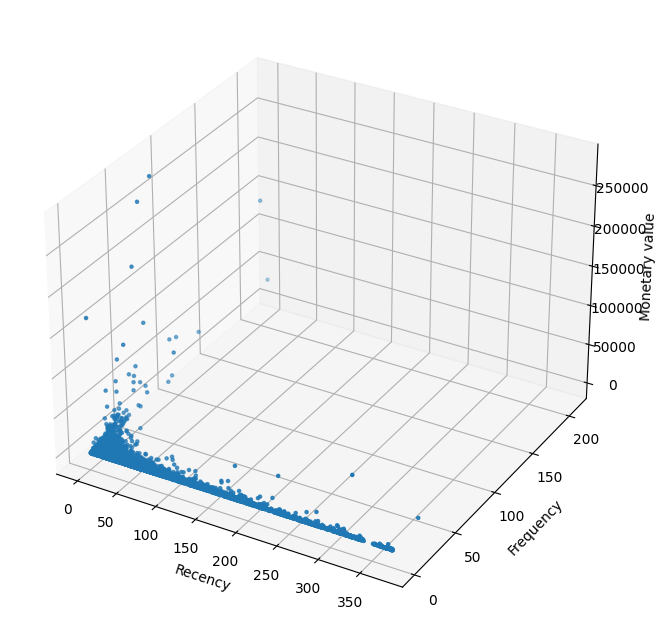

In [67]:
fig=plt.figure(figsize=(10,8),)
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [68]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [69]:
inertia_values = []
K_range = range(1, 11)  # Trying k values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

d:\ineubytesinternship\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ineubytesinternship\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ineubytesinternship\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ineubytesinternship\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ineubytesinternship\env\lib\site-packages\skl

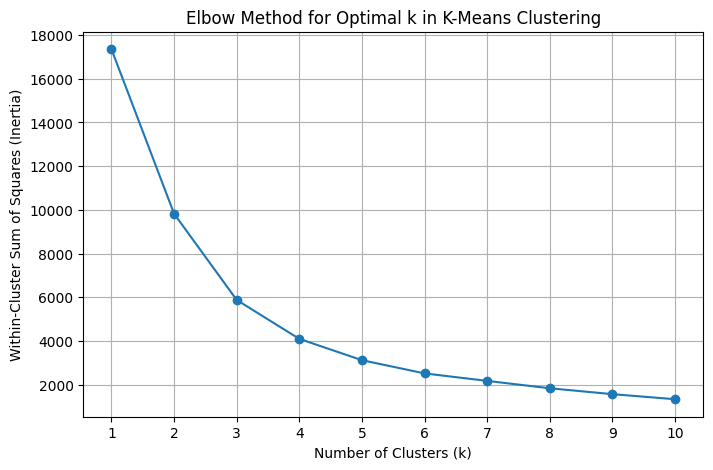

In [70]:
#Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [71]:

# Apply K-Means clustering to create clusters based on RFM metrics
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

d:\ineubytesinternship\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())


K-Means Clustering:
0    3052
1    1062
3     211
2      13
Name: KMeans_Cluster, dtype: int64


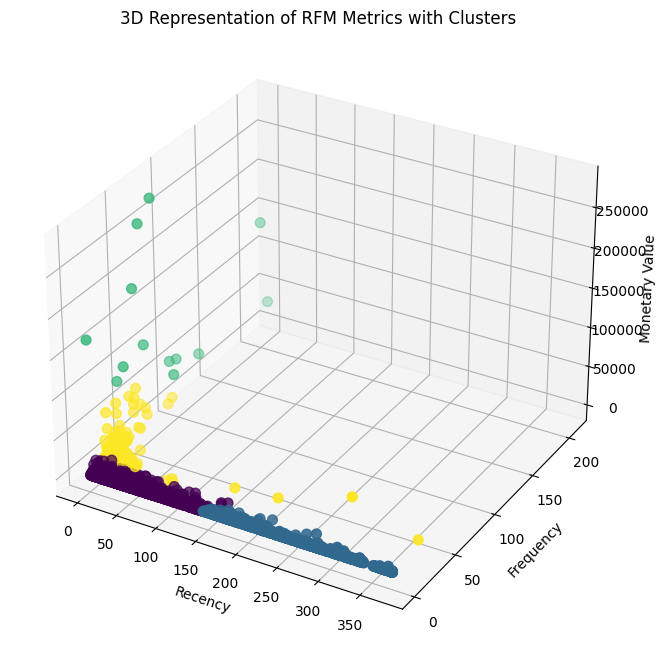

In [74]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [75]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [76]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
2    3052
3    1062
1     209
0      15
Name: Agg_Cluster, dtype: int64


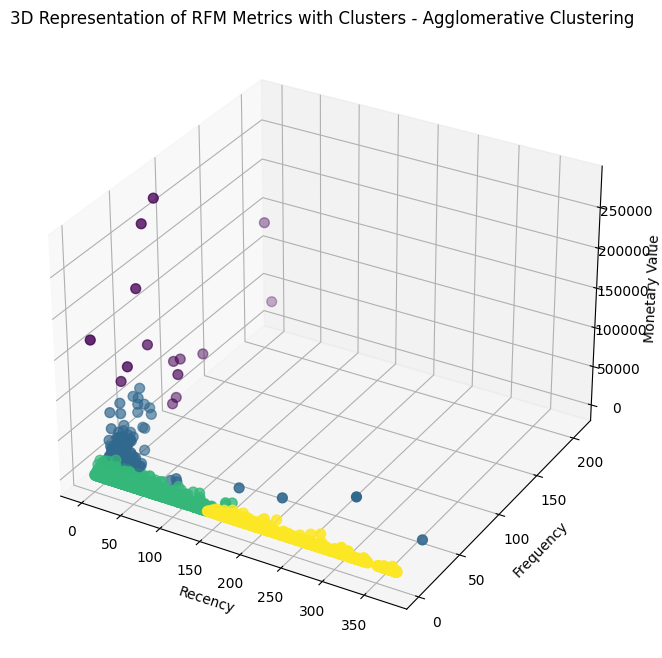

In [77]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()


# Interpretations of Customer Segments Based on Purchase Behavior

### Segment 1: High-Recency, Low-Frequency, Low-Monetary

Customers within this segment display infrequent purchasing behavior, evident from their high Recency value. Their low Frequency indicates rare buying activity, and the low MonetaryValue further highlights their minimal spending compared to other customer categories. These individuals may be at risk of churning or becoming inactive. To re-engage this segment, targeted and compelling strategies are necessary.

### Segment 2: Low-Recency, Low-Frequency, Low-Monetary

In this segment, customers exhibit low Recency, indicating relatively recent purchases. Despite this, they demonstrate low Frequency and Monetary Value, indicating modest spending and limited purchase occurrences. This group could consist of recent buyers who haven't yet displayed significant loyalty or engagement. To encourage increased spending and frequency, enticing incentives and personalized offers may be pivotal.

### Segment 3: High-Recency, High-Frequency, High-Monetary

Customers in this segment possess high Recency values, implying a lack of recent purchases. However, their frequent buying patterns, depicted by high Frequency, stand out. Moreover, their substantial MonetaryValue suggests significant expenditures compared to other segments. These customers represent the most valuable clients, warranting special attention through tailored incentives and loyalty initiatives to maintain their patronage.

 ### Segment 4: Low-Recency, High-Frequency, High-Monetary

This segment comprises customers with low Recency, indicating recent purchases. Remarkably, they exhibit high Frequency, frequently engaging in transactions. Their elevated MonetaryValue signifies substantial spending. These devoted patrons contribute significantly to the company's revenue stream. They are likely to respond positively to loyalty incentives and personalized recommendations, underscoring the importance of nurturing their ongoing engagement.

Understanding and classifying customer behavior into these distinct segments can provide businesses with valuable insights into their clientele. Tailoring strategies and initiatives based on these interpretations can help optimize marketing efforts, enhance customer retention, and drive overall business growth.